In [22]:
#http://readiab.org/book/latest/3/1

'''From a bioinformatics perspective, studying biological diversity is centered around a few key pieces of information:

A table of the frequencies of certain biological features (e.g., species or OTUs) on a per sample basis.
Sample metadata describing exactly what each of the samples is, as well as any relevant technical information.
Feature metadata describing each of the features. This can be taxonomic information, for example, but we'll come back to this when we discuss features in more detail (this will be completed as part of #105).
Optionally, information on the relationships between the biological features, typically in the form of a phylogenetic tree where tips in the tree correspond to OTUs in the table.'''
%matplotlib inline
import numpy as np
import pandas as pd
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d, Axes3D
from skbio.diversity import alpha_diversity

df= pd.read_csv('/home/erika/Desktop/likeliest_match_mz.csv')
newdf = pd.read_csv('/home/erika/Desktop/likeliest_match_abspres.csv')
averagetable = newdf.groupby(['Slope', 'Depth'])['n_peaks']
averagetable2= averagetable.agg(['mean', 'std'])
averagetable= averagetable.agg(['mean'])

print(averagetable2)
averagetable.style \
  .format('{:.2f}') \
  .bar(align='left', color=['#0c750b', '#266352']) \
  .set_caption('masses') \
  .set_properties(padding="15px", border='3px solid black', width='200px')



                  mean          std
Slope Depth                        
1S    05      4977.000   477.032494
      15      5710.125  1380.641615
      30      5187.625   311.637123
      60      5002.125  1065.120441
2B    05      5580.000  1095.305802
      15      5775.875   713.916249
      30      5153.250   570.800878
      60      4675.500  1521.545924
3F    05      5943.000   810.138671
      15      5552.750  1075.477004
      30      4423.125   408.120934
      60      5234.625   765.969402
4T    05      5002.000   545.508413
      15      5346.625  1275.519159
      30      4963.625  1171.944408
      60      4099.875  1910.148568
5ST   Stream  5388.200   969.993333


<bound method Index.unique of Index(['C4H6O3', 'C5H10O2', 'C2H4N2OS', 'C3H9N2P', 'C6H3NO', 'C7H6O', 'C6H4O2',
       'C7H8O', 'C6H7NO', 'C6H6O2',
       ...
       'C45H58O22', 'C44H56O23', 'C40H65N4O16PS2', 'C47H60O21', 'C46H58O22',
       'C46H60O22', 'C48H64O21', 'C41H63N4O17PS2', 'C46H60O23',
       'C43H65N4O16PS2'],
      dtype='object', name='formula_isotopefree', length=9899)>


'\nPlot two is a histogram of the number of times a specific isotope confirmed molecule appears in the sample set. The distribution is super weird. \nThere are very few unique molecules (some that are are shared rather narrowly and many that are universal)\n'

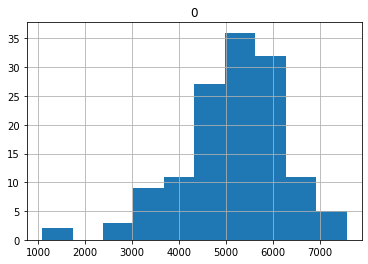

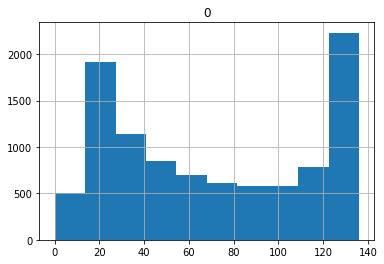

In [29]:

'''
This is again the number of molecules that exist within the sample set (including replicates) not necessarily excluding all of the contaminants. Most of these plots are alphas diversity metrics with beta dibersity following later. 
the docs for this version are here:
http://scikit-bio.org/docs/latest/diversity.html
'''
%matplotlib inline

df= pd.read_csv('/home/erika/Desktop/likeliest_match_mz.csv')
newdf = pd.read_csv('/home/erika/Desktop/likeliest_match_abspres.csv')

Samp = df.copy()
Samp.fillna(0, inplace=True)
Samp = Samp.set_index('formula_isotopefree')
SampleID = list(Samp.columns)
SampT = Samp.T
data2 = SampT.values

OTUID= list(SampT.columns)
dataOTU= Samp.values

adiv_obs_otus = alpha_diversity('observed_otus', data2, SampleID)
adiv_obs_otus_OTU = alpha_diversity('observed_otus', dataOTU, OTUID)

df1 = pd.DataFrame(adiv_obs_otus)
dfOTU = pd.DataFrame(adiv_obs_otus_OTU)
df1.hist()
dfOTU.hist()

'''
Plot two is a histogram of the number of times a specific isotope confirmed molecule appears in the sample set. The distribution is super weird. 
There are very few unique molecules (some that are are shared rather narrowly and many that are universal)
'''


In [31]:

bcm= beta_diversity('braycurtis', data2, SampleID)
print(bcm)

136x136 distance matrix
IDs:
'H1S05', 'H1S05.1', 'H1S15', 'H1S15.1', 'H1S30', 'H1S30.1', 'H1S60', 'H1S60.1', ...
Data:
[[0.         0.09548184 0.31497327 ... 0.42650368 0.21656055 0.21673928]
 [0.09548184 0.         0.3277921  ... 0.4157112  0.2226484  0.22360959]
 [0.31497327 0.3277921  0.         ... 0.62759388 0.2778758  0.26437956]
 ...
 [0.42650368 0.4157112  0.62759388 ... 0.         0.49155429 0.50362312]
 [0.21656055 0.2226484  0.2778758  ... 0.49155429 0.         0.08384687]
 [0.21673928 0.22360959 0.26437956 ... 0.50362312 0.08384687 0.        ]]


In [11]:
# TransForm.columns = TransForm.iloc[0]
# TransForm = pd.DataFrame.drop(TransForm, 'mz', axis=0)
# TransForm = TransForm.fillna(0)
# TransForm = TransForm.reset_index()
# new = TransForm['index'].str.split('(\d+)([A-Za-z]+)', n = 3, expand = True) 
# new['SiteName'] = new[0]+ new[1] 
# new = new.rename(columns={2: 'Position', 3: 'Depth'})
# ids = pd.DataFrame.drop(new, [0,1], axis=1)
# OTU_equivalent = pd.DataFrame.drop(TransForm, 'index', axis=1) 


#averagetable = newdf.groupby(['Depth'])['n_peaks'].mean()
#print(averagetable.reset_index())

#bc_dm = beta_diversity("braycurtis", newdf, ids)
#print(bc_dm)